## What Is a Neural Network?

A neural network is a collection of layers of neurons that takes data as input, trains itself to recognize patterns in the data, and predicts output for similar kinds of data.
Artificial neural networks are loosely modeled on biological neural networks.
In layman’s terms, as a tiny amount of information passes from one neuron to another in biological neural networks, information passes between neurons of different layers in artificial neural networks.

**Every artificial neural network has the following components:**

**Input layer:** In structured data, the number of nodes in the input layer will be equal to the number of features. In unstructured data, such as images, the number of nodes will be equal to the size of the image.

**Weights and bias:** The inputs to each neuron/node are modified using weights and are summed with bias.

**Hidden layers:** The size of the hidden layers (number of hidden layers and the number of neurons in each hidden layer) will be arbitrary depending on the type of data we’re dealing with. Neurons in the hidden layers are the core processing units of the neural network. Each neuron in the hidden layer holds information about a specific sub-component of the data. For example, in an image recognition task, each neuron in the network will have some information about the edges in the image.

**Output layer:** The number of nodes in the output layer depends on the number of classes in the label column.

**Activation functions:** These are the mathematical functions that are applied to every neuron in the hidden layers and the output layer. There are many activation functions available, of which we’ll be using *sigmoid* and *ReLU*.

# Let’s Build Our Neural Network
Let’s consider a three-layered neural network(two hidden layers and one output layer).

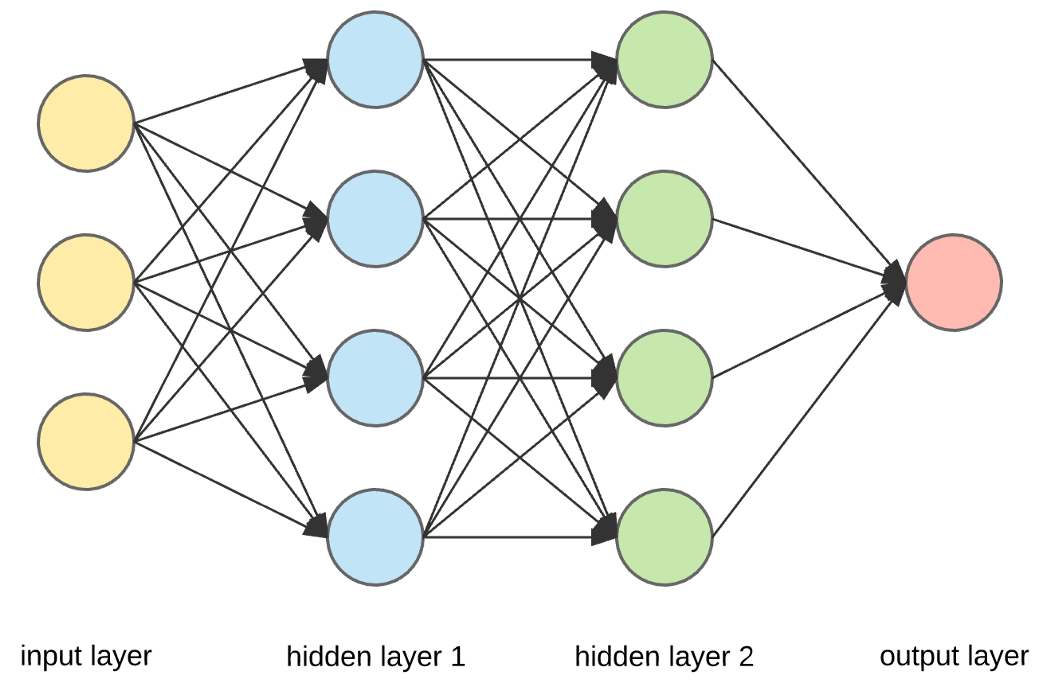

We have to create a class for our neural network and initialize the weights and bias randomly for all three layers.

In [8]:
class MY_Neural_Network:
    def __init__(self,layers,x,y,learning_rate=0.001):
        
        self.w1 = np.random.rand(layers[1],layers[0])
        self.b1 = np.random.rand(layers[1],1)
        
        self.w2 = np.random.rand(layers[2],layers[1])
        self.b2 = np.random.rand(layers[2],1)
        
        self.w3 = np.random.rand(layers[3],layers[2])
        self.b3 = np.random.rand(layers[3],1)
        
        self.input = x.T
        self.y = y
        
        self.output = np.zeros(y.shape)
        
        self.alpha = learning_rate

# Forward propagation

Each layer’s input is modified using weights and bias of the respective layer. The result is then fed into the activation function and is forwarded to the next layer.

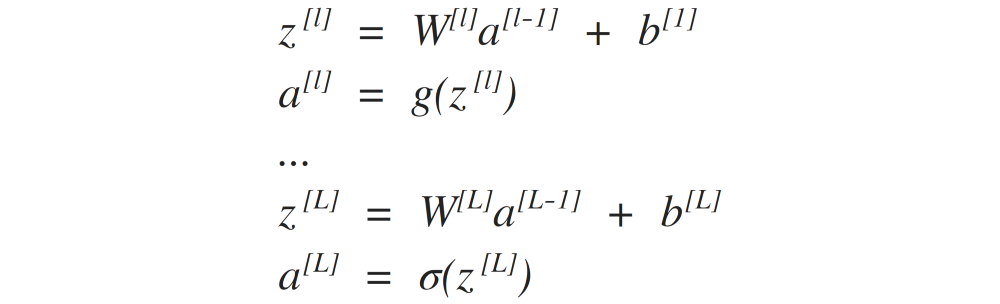

For all the hidden layers, we’ll be using the ReLU activation function, and for the output layer, we’ll be using the sigmoid activation function since it’s a binary classification. We can use **softmax regression** in cases of multi-class classification.

**Note:** *tanH *and *LeakyReLU* are the other activation functions that can be used.

**Note:** We perform dot product on the weights of the layer and inputs to the layer. So, we always have to keep track of the matrix dimensions. Transpose the inputs wherever needed.

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)
    
class MY_Neural_Network:
    def __init__(self,layers,x,y,learning_rate=0.001):
        
        self.w1 = np.random.rand(layers[1],layers[0])
        self.b1 = np.random.rand(layers[1],1)
        
        self.w2 = np.random.rand(layers[2],layers[1])
        self.b2 = np.random.rand(layers[2],1)
        
        self.w3 = np.random.rand(layers[3],layers[2])
        self.b3 = np.random.rand(layers[3],1)
        
        self.input = x.T
        self.y = y
        
        self.output = np.zeros(y.shape)
        
        self.alpha = learning_rate
        
    
    def forwardpropogation(self):
        
        self.z1 = np.dot(self.w1,self.input)+self.b1
        self.a1 = relu(self.z1)
        
        self.z2 = np.dot(self.w2,self.a1)+self.b2
        self.a2 =  relu(self.z2)
        
        self.z3 = np.dot(self.w3,self.a2)+self.b3
        self.output = sigmoid(self.z3)

# Loss function

With the randomly initialized weights, we’ll be predicting the output and then calculating error in the predictions. This error/deviation of predicted values from true values is called cost/loss of neural network.

Below is the loss function **(binary cross-entropy)** of the neural network.

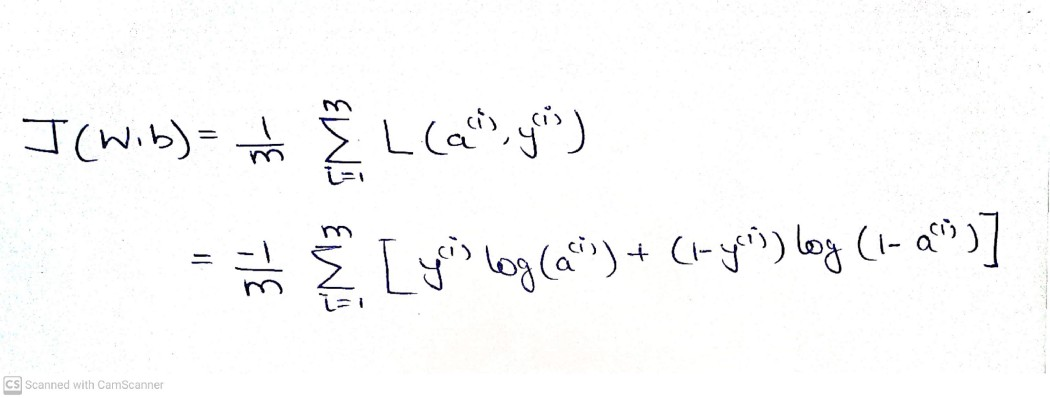

There are many loss functions available. Since we’re dealing with classification, binary cross-entropy is used for binary classification and sparse categorical cross-entropy is used for multi-class classification.

# Backward propagation

We’ll now propagate backward to find out the slope of the cost function to update our weights and bias.

We can’t calculate the slope of cost function directly w.r.t weights and bias. We need to proceed sequentially as shown in the below image.

**Note:** In the below derivation I’ve used the sigmoid activation function. You can change the activation function.

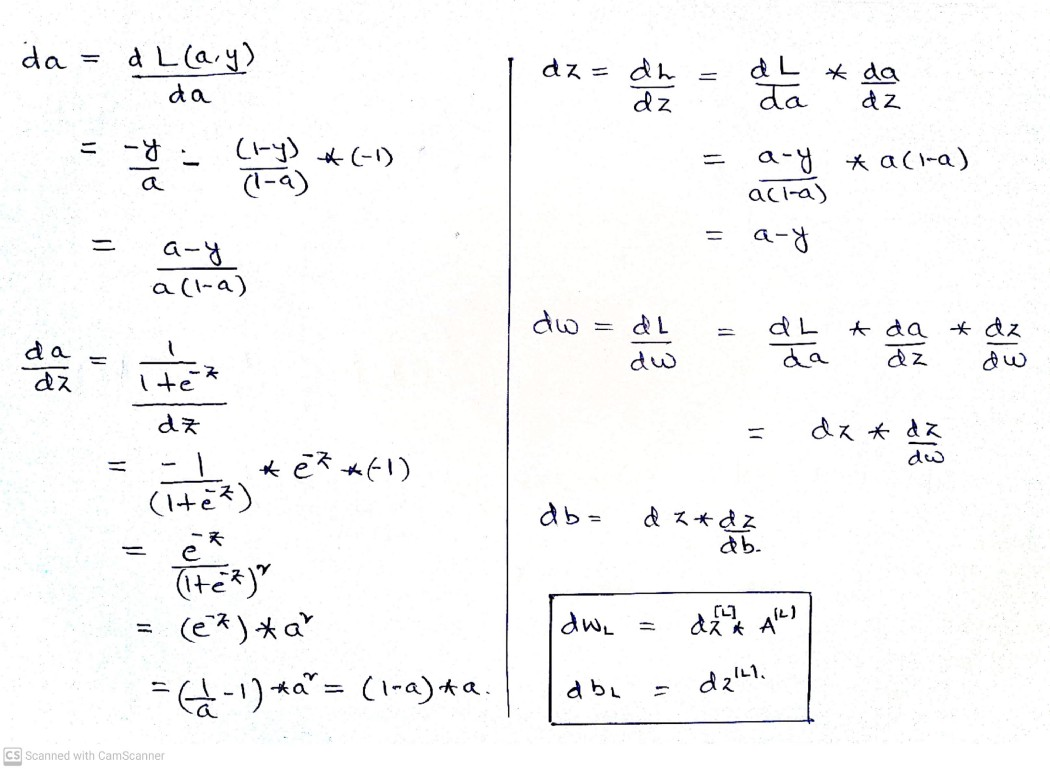

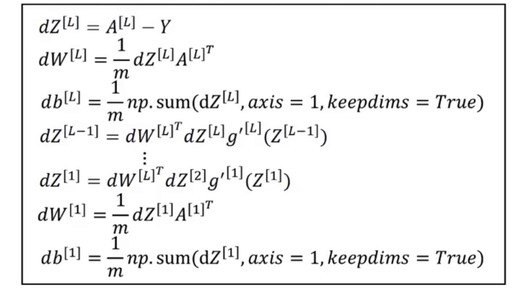

# Gradient descent

We have to keep updating the weights and bias of the neural network until the cost of the neural network is minimum. Technically, until the cost reaches a global minimum.
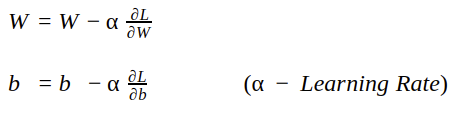

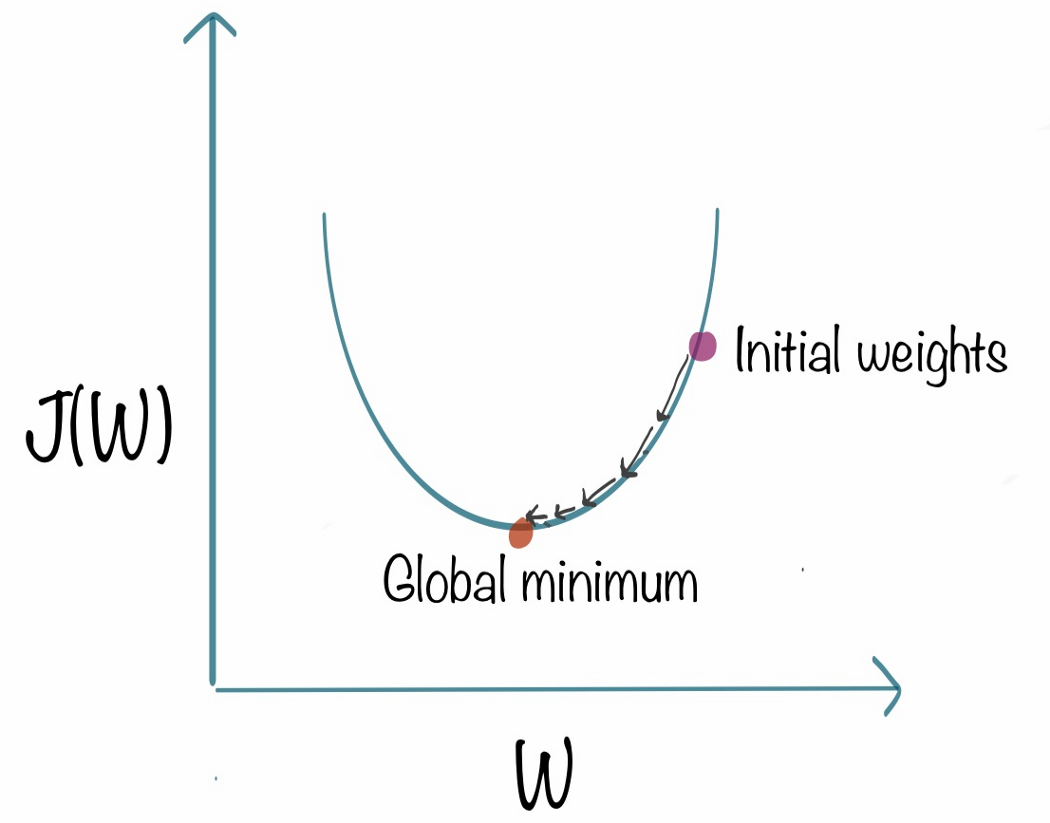

**Note:** The rate at which the cost reaches the global minimum is determined by the learning rate(alpha). If the learning rate is high, then step size will be high and the cost may never reach the global minimum. If the learning rate is low, it takes a lot of time to reach the global minimum. So, the learning rate should be optimum.

The below figure explains it.

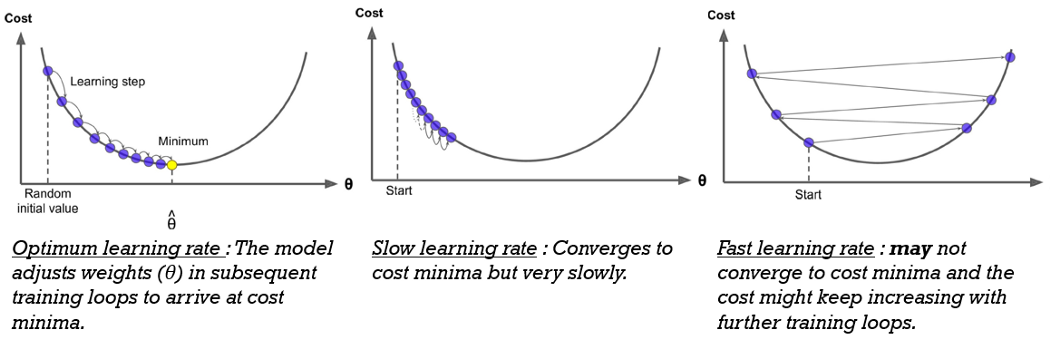

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def derivative_sigmoid(x):
    return x*(1-x)
    
def relu(x):
    return np.maximum(0,x)
    
def derivative_relu(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] >0:
                x[i][j]=1
            else:
                x[i][j]=0
    return x

class MY_Neural_Network:
    def __init__(self,layers,x,y,learning_rate=0.001):
        
        self.w1 = np.random.rand(layers[1],layers[0])
        self.b1 = np.random.rand(layers[1],1)
        
        self.w2 = np.random.rand(layers[2],layers[1])
        self.b2 = np.random.rand(layers[2],1)
        
        self.w3 = np.random.rand(layers[3],layers[2])
        self.b3 = np.random.rand(layers[3],1)
        
        self.input = x.T
        self.y = y
        
        self.output = np.zeros(y.shape)
        
        self.alpha = learning_rate
        
    
    def forwardpropogation(self):
        
        self.z1 = np.dot(self.w1,self.input)+self.b1
        self.a1 = relu(self.z1)
        
        self.z2 = np.dot(self.w2,self.a1)+self.b2
        self.a2 = relu(self.z2)
        
        self.z3 = np.dot(self.w3,self.a2)+self.b3
        self.output = sigmoid(self.z3)
    
    def backwardpropogation(self):

        self.dz3 = self.output-self.y
        self.dw3 = 1/self.y.shape[1]*np.dot(self.dz3,self.a2.T)
        self.db3 = 1/self.y.shape[1]*np.sum(self.dz3,axis=1,keepdims=True)
        
        self.dz2 = np.dot(self.dw3.T,self.dz3)*derivative_relu(self.z2)
        self.dw2 = 1/self.y.shape[1]*np.dot(self.dz2,self.a1.T)
        self.db2 = 1/self.y.shape[1]*np.sum(self.dz2,axis=1,keepdims=True)
        
        self.dz1 = np.dot(self.dw2.T,self.dz2)*derivative_relu(self.z1)
        self.dw1 = 1/self.y.shape[1]*np.dot(self.dz1,self.input.T)
        self.db1 = 1/self.y.shape[1]*np.sum(self.dz1,axis=1,keepdims=True)
        
        self.w1=self.w1-self.alpha*self.dw1
        self.b1=self.b1-self.alpha*self.db1
        
        self.w2=self.w2-self.alpha*self.dw2
        self.b2=self.b2-self.alpha*self.db2
        
        self.w3=self.w3-self.alpha*self.dw3
        self.b3=self.b3-self.alpha*self.db3
        
        return self.w1,self.b1,self.w2,self.b2,self.w3,self.b3
        
    def cost(self):
        cost=-1/self.y.shape[1]*np.sum((self.y*np.log(self.output)+(1-self.y)*np.log(1-self.output)))
        return cost

At the global minimum, we’ll be having the best set of weights and bias and the cost will also be minimum.

Our goal is to find out the best set of weights and bias that can be used for further predictions.

# How to Know the Global Minimum?
 
Run the forward propagation, backward propagation functions for some iterations, and calculate the cost for each iteration. The iteration in which the cost is low is the global minimum.


To know about more topics refer my 

medium blog - https://medium.com/@srujan.krish97
 
kaggle - https://www.kaggle.com/krishnasrujan/account
    